<a href="https://colab.research.google.com/github/nrsmadmrl/proje/blob/main/projecalismasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import AllChem
import warnings
warnings.filterwarnings("ignore")


In [75]:
from google.colab import files
uploaded = files.upload()

Saving DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_.csv to DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_ (1).csv


In [76]:
df = pd.read_csv("DOWNLOAD-qWLdRiPB8YlM4SYWvX3KiBrVNSpBaB3a-hhrFdJEy7Q_eq_.csv", sep=';')

In [77]:
df.shape

(7022, 48)

In [78]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL66775,NaN,NaN,318.48,0.0,4.00,4,C[C@]12C[C@@H](S)C(=O)C=C1CCC1C2CC[C@]2(C)C(=O...,Activity remaning,'=',...,CHEMBL1124325,1,Scientific Literature,J Med Chem,1989,NaN,NaN,NaN,NaN,75.000
1,CHEMBL176098,NaN,NaN,251.33,0.0,3.97,14,COc1ccc2c(c1)CCC/C2=C/c1cccnc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,4.000
2,CHEMBL176886,NaN,NaN,251.33,0.0,3.97,17,CCOc1ccc2c(c1)CC/C2=C/c1cccnc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,7.680
3,CHEMBL175962,NaN,NaN,207.28,0.0,3.57,26,C(=C1\CCc2ccccc21)\c1ccncc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,6.700
4,CHEMBL366773,NaN,NaN,286.17,0.0,4.33,33,Brc1ccc2c(c1)CC/C2=C\c1ccncc1,IC50,'=',...,CHEMBL1240479,1,Scientific Literature,Eur J Med Chem,2010,NaN,NaN,NaN,NaN,2.469


In [79]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [80]:
df = df[["Smiles", "Standard Type", "Standard Value", "Standard Units"]].copy() #Sadece ihtiyacımız olan kolonları tuttum

In [81]:
df = df[df["Standard Type"] == "IC50"] #Sadece IC50 ölçümleri

In [82]:
df = df.dropna(subset=["Smiles", "Standard Value", "Standard Units"]) #Eksik değerleri temizledim

In [83]:
df = df[df["Standard Units"] == "nM"] #Birim filtresi (şimdilik sadece nM)

In [84]:
df["Standard Value"] = pd.to_numeric(df["Standard Value"], errors="coerce") #Sayıya çevir

df = df.dropna(subset=["Standard Value"])


In [85]:
df.shape


(4285, 4)

In [86]:
df["Standard Value"].describe()


,Standard Value
count,4.285000e+03
mean,1.466310e+10
std,5.942559e+11
min,0.000000e+00
25%,1.100800e+02
50%,1.010000e+03
75%,6.998420e+03
max,3.388442e+13


In [87]:
df["IC50_M"] = df["Standard Value"] * 1e-9
#molar

In [88]:
df["pIC50"] = -np.log10(df["IC50_M"])

In [89]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["pIC50"])
#geçersiz değerler

In [90]:
df["pIC50"].describe()


,pIC50
count,4284.000000
mean,6.052955
std,1.506779
min,-4.530000
25%,5.155000
50%,5.994840
75%,6.955815
max,17.899974


In [107]:
df = df[(df["pIC50"] >= 3) & (df["pIC50"] <= 11)]

In [92]:
df["pIC50"].describe()

,pIC50
count,4200.000000
mean,6.141250
std,1.319869
min,3.006123
25%,5.207990
50%,6.000000
75%,6.974694
max,11.000000


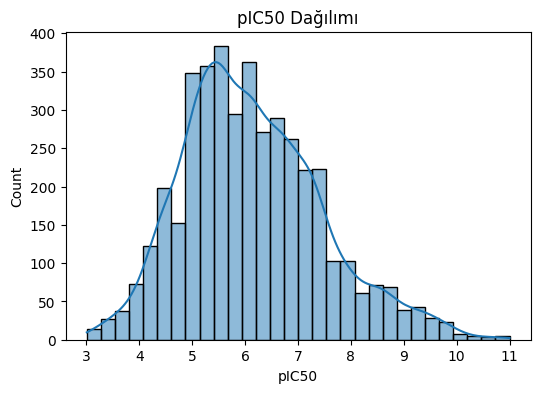

In [93]:
plt.figure(figsize=(6,4))
sns.histplot(df["pIC50"], bins=30, kde=True)
plt.xlabel("pIC50")
plt.title("pIC50 Dağılımı")
plt.show()


In [94]:
df = df.reset_index(drop=True)
df.shape


(4200, 6)

In [95]:
df["mol"] = df["Smiles"].apply(Chem.MolFromSmiles)

In [98]:
df = df[df["mol"].notnull()].copy()

In [99]:
df.shape


(3096, 3)

In [100]:

df = (df.groupby("Smiles", as_index=False).agg({"pIC50": "median","mol": "first"}))


In [101]:
df.shape

(3096, 3)

In [102]:
df.head()


,Smiles,pIC50,mol
0,Brc1cc(Br)c2oc(Cn3ccnc3)cc2c1,5.094000,<rdkit.Chem.rdchem.Mol object at 0x7a12a88e3450>
1,Brc1ccc(-c2csc(-c3cccnc3)n2)cn1,5.130182,<rdkit.Chem.rdchem.Mol object at 0x7a12a892ee30>
2,Brc1ccc(-c2csc(-c3ccncc3)n2)cn1,5.571865,<rdkit.Chem.rdchem.Mol object at 0x7a12a88e05f0>
3,Brc1ccc(-c2nc(-c3cccnc3)cs2)cc1,5.101275,<rdkit.Chem.rdchem.Mol object at 0x7a12a88fcf90>
4,Brc1ccc(-c2nsc(-c3ccc(Br)cc3)n2)cc1,4.301030,<rdkit.Chem.rdchem.Mol object at 0x7a12a892ef80>


In [106]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

morgan_gen = GetMorganGenerator(radius=2, fpSize=2048)

def morgan_fp(mol):
   return morgan_gen.GetFingerprint(mol)

df["fingerprint"] = df["mol"].apply(morgan_fp)

#Morgan Fingerprint fonksiyonu

In [ ]:
df["fingerprint"] = df["mol"].apply(morgan_fp)
#Fingerprint üret

In [ ]:
X = np.array([np.array(fp) for fp in df["fingerprint"]])
y = df["pIC50"].values


In [ ]:
X.shape, y.shape


((3096, 2048), (3096,))

In [ ]:
np.isnan(X).sum(), np.isnan(y).sum()


(np.int64(0), np.int64(0))

In [73]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train_r.shape, X_test_r.shape


((2476, 2048), (620, 2048))

In [72]:
from rdkit.Chem.Scaffolds import MurckoScaffold

def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return MurckoScaffold.MurckoScaffoldSmiles(
        mol=mol,
        includeChirality=False
    )

df["scaffold"] = df["Smiles"].apply(get_scaffold)
df = df[df["scaffold"].notnull()].copy()
df = df.reset_index(drop=True)




In [ ]:
from collections import defaultdict

scaffold_groups = defaultdict(list)

for idx, scaffold in enumerate(df["scaffold"]):
    scaffold_groups[scaffold].append(idx)
#scaffold’lara göre indeksleme

In [ ]:
scaffolds_sorted = sorted(
    scaffold_groups.values(),
    key=lambda x: len(x),
    reverse=True
)

train_idx = []
test_idx = []

test_size = int(0.2 * len(df))

for scaffold in scaffolds_sorted:
    if len(test_idx) + len(scaffold) <= test_size:
        test_idx.extend(scaffold)
    else:
        train_idx.extend(scaffold)
#greedy scaffold split (%20 test)

In [ ]:
X_train_s = X[train_idx]
X_test_s  = X[test_idx]
y_train_s = y[train_idx]
y_test_s  = y[test_idx]

X_train_s.shape, X_test_s.shape

((2477, 2048), (619, 2048))

In [ ]:
print("Random split:", X_train_r.shape, X_test_r.shape)
print("Scaffold split:", X_train_s.shape, X_test_s.shape)

Random split: (2476, 2048) (620, 2048)
Scaffold split: (2477, 2048) (619, 2048)


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
sklearn.__version__

'1.6.1'

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr = LinearRegression()

lr.fit(X_train_r, y_train_r)
y_pred_r = lr.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r, rmse_r
#RANDOM split


(-9.250333860304641, np.float64(4.138973330488708))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr.fit(X_train_s, y_train_s)
y_pred_s = lr.predict(X_test_s)

r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s, rmse_s

#SCAFFOLD split

(-5.768960424328419, np.float64(3.5860739996724145))

In [109]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)


In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

In [ ]:
ridge.fit(X_train_r, y_train_r)
y_pred_r = ridge.predict(X_test_r)

r2_r_ridge = r2_score(y_test_r, y_pred_r)
rmse_r_ridge = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r_ridge, rmse_r_ridge

#RANDOM split

(0.6124706735389593, np.float64(0.8047776547069158))

In [ ]:
ridge.fit(X_train_s, y_train_s)
y_pred_s = ridge.predict(X_test_s)

r2_s_ridge = r2_score(y_test_s, y_pred_s)
rmse_s_ridge = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s_ridge, rmse_s_ridge
#SCAFFOLD split

(0.4029768679922646, np.float64(1.0650103757511744))

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


#overfitting azaltmak için

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf.fit(X_train_r, y_train_r)
y_pred_r = rf.predict(X_test_r)

r2_r = r2_score(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

r2_r, rmse_r
#RANDOM split

(0.6895059002340971, np.float64(0.7203611761591605))

In [57]:
rf.fit(X_train_s, y_train_s)
y_pred_s = rf.predict(X_test_s)

r2_s = r2_score(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_s, rmse_s
#SCAFFOLD split

(0.4523310181409276, np.float64(1.0200403038654762))

In [56]:
y_train_pred = rf.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

r2_train, r2_test
#rain–Test farkı

(0.8974618198959624, 0.4029768679922646)

In [58]:
rf_results = pd.DataFrame({
    "Model": ["Random Forest (Random)", "Random Forest (Scaffold)"],
    "R2": [r2_r, r2_s],
    "RMSE": [rmse_r, rmse_s]
})

rf_results


,Model,R2,RMSE
0,Random Forest (Random),0.689506,0.720361
1,Random Forest (Scaffold),0.452331,1.020040


In [61]:
rf_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)


In [62]:
rf_reg.fit(X_train_s, y_train_s)

y_pred_s = rf_reg.predict(X_test_s)
y_train_pred = rf_reg.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_train, r2_test, rmse_test

(0.6219828789420039, 0.38343739555486334, np.float64(1.0822979850088026))

In [63]:
rf_reg_results = pd.DataFrame({
    "Model": ["Random Forest (Reg, Scaffold)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

rf_reg_results


,Model,R2,RMSE
0,"Random Forest (Reg, Scaffold)",0.383437,1.082298


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
#XGBoost

In [66]:
xgb.fit(X_train_s, y_train_s)

y_pred_s = xgb.predict(X_test_s)
y_train_pred = xgb.predict(X_train_s)

r2_train = r2_score(y_train_s, y_train_pred)
r2_test  = r2_score(y_test_s, y_pred_s)

rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_s))

r2_train, r2_test, rmse_test

(0.9013237709497022, 0.44069896000641195, np.float64(1.030815815259178))

In [67]:
xgb_results = pd.DataFrame({
    "Model": ["XGBoost (Scaffold)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

xgb_results


,Model,R2,RMSE
0,XGBoost (Scaffold),0.440699,1.030816


In [69]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

morgan_gen_r3 = GetMorganGenerator(
    radius=3,
    fpSize=2048
)

def morgan_fp_r3(mol):
    return morgan_gen_r3.GetFingerprint(mol)
#yan yana

In [111]:
df["fingerprint_r3"] = df["mol"].apply(morgan_fp_r3)
#(r=3)

In [112]:
X_r3 = np.array([np.array(fp) for fp in df["fingerprint_r3"]])
y = df["pIC50"].values

X_r3.shape, y.shape
#X ve y (r=3)

((3096, 2048), (3096,))

In [113]:
X_train_s_r3 = X_r3[train_idx]
X_test_s_r3  = X_r3[test_idx]
y_train_s    = y[train_idx]
y_test_s     = y[test_idx]

X_train_s_r3.shape, X_test_s_r3.shape


((2477, 2048), (619, 2048))

In [116]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_r3 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
#feature değişiyor.

In [157]:
xgb_r3.fit(X_train_s_r3, y_train_s)

y_pred_test = xgb_r3.predict(X_test_s_r3)
y_pred_train = xgb_r3.predict(X_train_s_r3)

r2_train = r2_score(y_train_s, y_pred_train)
r2_test  = r2_score(y_test_s, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test_s, y_pred_test))

r2_train, r2_test, rmse_test

(0.9231793201782088, 0.3613377753555187, np.float64(1.1015237726375544))

In [117]:
xgb_r3_results = pd.DataFrame({
    "Model": ["XGBoost (Scaffold, Morgan r=3)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

xgb_r3_results


,Model,R2,RMSE
0,"XGBoost (Scaffold, Morgan r=3)",0.361338,1.101524


In [118]:
final_results = pd.concat([
    rf_results,
    rf_reg_results,
    xgb_results,
    xgb_r3_results
], ignore_index=True)

final_results


,Model,R2,RMSE
0,Random Forest (Random),0.689506,0.720361
1,Random Forest (Scaffold),0.452331,1.020040
2,"Random Forest (Reg, Scaffold)",0.383437,1.082298
3,XGBoost (Scaffold),0.440699,1.030816
4,"XGBoost (Scaffold, Morgan r=3)",0.361338,1.101524


In [121]:
from rdkit.Chem import Descriptors

def calc_descriptors(mol):
    return [
        Descriptors.MolWt(mol),
        Descriptors.MolLogP(mol),
        Descriptors.TPSA(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumRotatableBonds(mol),
        Descriptors.RingCount(mol),
        Descriptors.HeavyAtomCount(mol)
    ]

In [156]:
import pandas as pd

desc_cols = [
    "MolWt", "LogP", "TPSA",
    "HBD", "HBA", "RotB",
    "RingCount", "HeavyAtoms"
]

desc_df = pd.DataFrame(
    df["mol"].apply(calc_descriptors).tolist(),
    columns=desc_cols
)

desc_df.head()

,MolWt,LogP,TPSA,HBD,HBA,RotB,RingCount,HeavyAtoms
0,356.017,4.2026,30.96,0,3,2,3,17
1,318.199,4.0296,38.67,0,4,2,3,18
2,318.199,4.0296,38.67,0,4,2,3,18
3,317.211,4.6346,25.78,0,3,2,3,18
4,396.107,5.3971,25.78,0,3,2,3,19


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
desc_scaled = scaler.fit_transform(desc_df)

In [124]:
import numpy as np

X_fp = np.array([np.array(fp) for fp in df["fingerprint"]])

X_hybrid = np.hstack([X_fp, desc_scaled])

X_hybrid.shape
#fingerprint (r=2) + Descriptor

(3096, 2056)

In [127]:
X_train_h = X_hybrid[train_idx]
X_test_h  = X_hybrid[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

X_train_h.shape, X_test_h.shape
#scaffold split

((2477, 2056), (619, 2056))

In [162]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb_hybrid = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [164]:
xgb_hybrid.fit(X_train_h, y_train)

y_pred_test = xgb_hybrid.predict(X_test_h)
y_pred_train = xgb_hybrid.predict(X_train_h)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train, r2_test, rmse_test

(0.9290286744827463, 0.4718574301748618, np.float64(1.001691173097486))

In [165]:
X_train_h = X_hybrid[train_idx]
X_test_h  = X_hybrid[test_idx]

y_train = y[train_idx]
y_test  = y[test_idx]

In [132]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [137]:
enet = ElasticNet(
    max_iter=10000,
    random_state=42
)

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1.0],
    "l1_ratio": [0.1, 0.5, 0.9]
}

In [141]:
grid = GridSearchCV(enet,param_grid,scoring="r2",cv=5,n_jobs=-1)

grid.fit(X_train_h, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='r2')

In [142]:
best_enet = grid.best_estimator_
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [143]:
y_pred_test = best_enet.predict(X_test_h)
y_pred_train = best_enet.predict(X_train_h)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

r2_train, r2_test, rmse_test


(0.7175061918634444, 0.44207976908244007, np.float64(1.0295425837437535))

In [144]:
enet_results = pd.DataFrame({
    "Model": ["ElasticNet (Scaffold, Hybrid)"],
    "R2": [r2_test],
    "RMSE": [rmse_test]
})

enet_results


,Model,R2,RMSE
0,"ElasticNet (Scaffold, Hybrid)",0.44208,1.029543


In [145]:
pip install shap

In [152]:
import shap

In [160]:
shap.initjs()

In [166]:
explainer = shap.TreeExplainer(xgb_hybrid)

In [167]:
shap_values = explainer.shap_values(X_test_h)

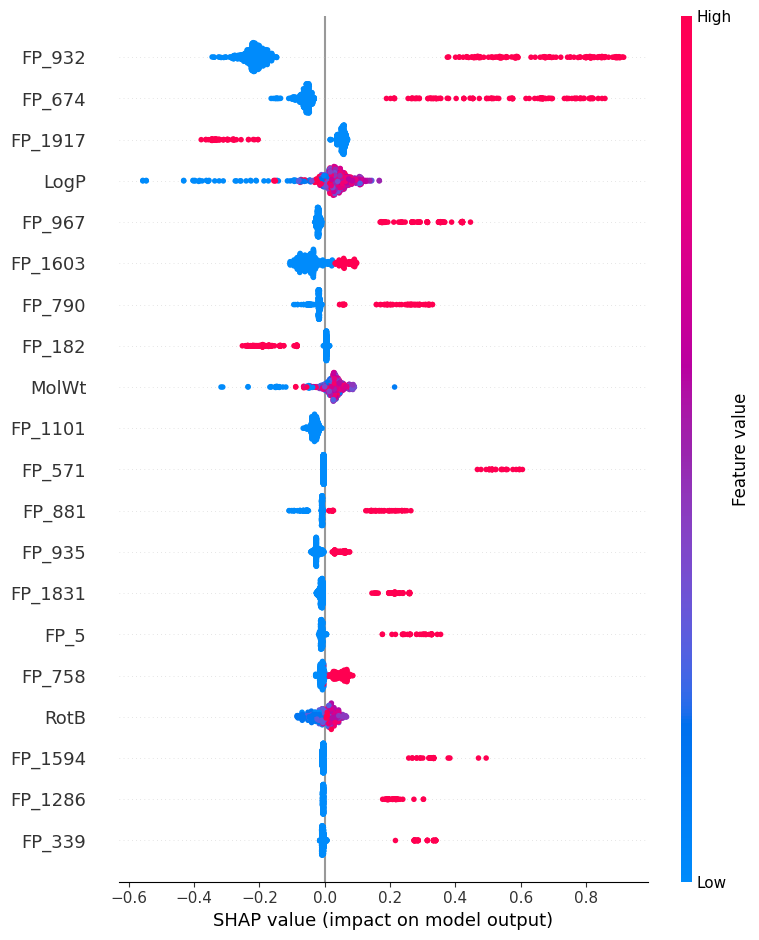

In [168]:
shap.summary_plot(
    shap_values,
    X_test_h,
    feature_names = (
        [f"FP_{i}" for i in range(2048)] + desc_cols
    ),
    max_display=20
)


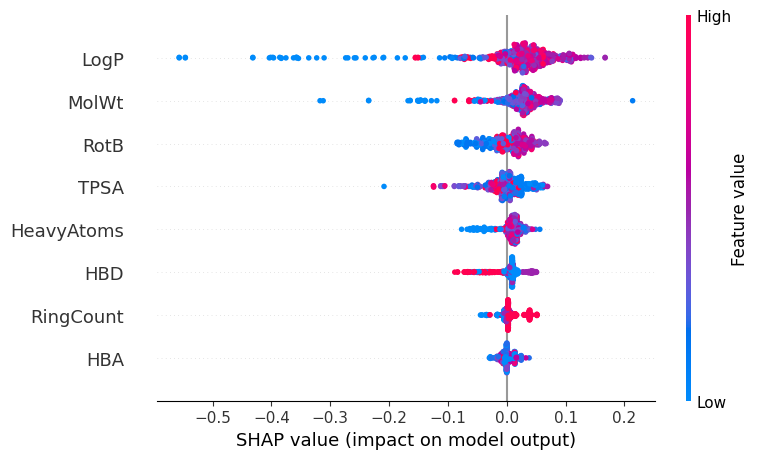

In [169]:
shap.summary_plot(
    shap_values[:, -len(desc_cols):],
    X_test_h[:, -len(desc_cols):],
    feature_names=desc_cols
)


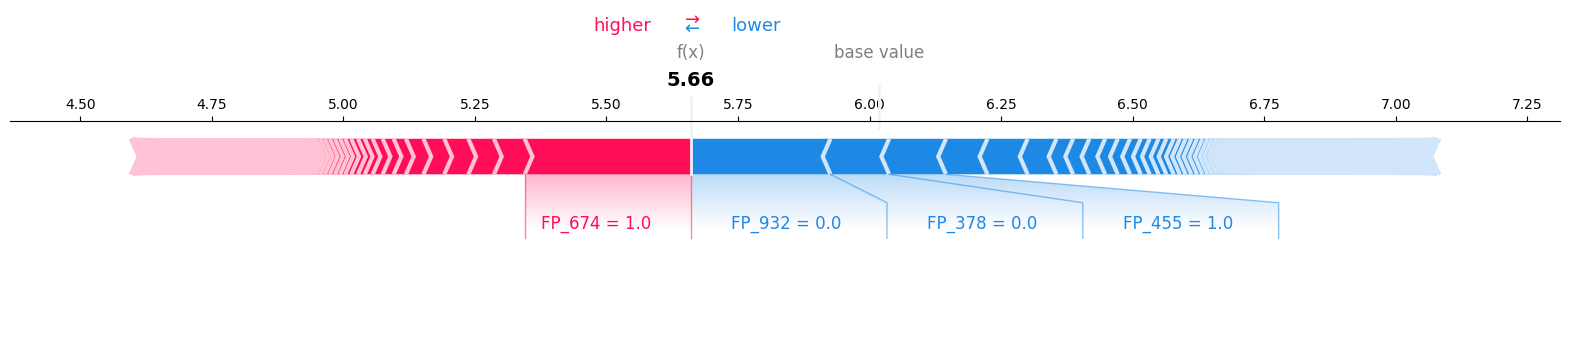

In [170]:
i = 0 # Define 'i' to select the first data point
shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test_h[i],
    feature_names = (
        [f"FP_{j}" for j in range(2048)] + desc_cols
    ),
    matplotlib=True
)

In [171]:
fucoxanthin_smiles = "COc1cc(c2C(=O)C[C@@H](c3ccccc3)Oc2c1)O"
#bir alg üzerinde dene

In [172]:
from rdkit import Chem

fucox_mol = Chem.MolFromSmiles(fucoxanthin_smiles)

if fucox_mol is None:
    raise ValueError("Fucoxanthin SMILES geçersiz")


In [173]:
fucox_fp = morgan_gen.GetFingerprint(fucox_mol)
fucox_fp = np.array(fucox_fp)


In [174]:
fucox_desc = calc_descriptors(fucox_mol)
fucox_desc_df = pd.DataFrame([fucox_desc], columns=desc_cols)

fucox_desc_scaled = scaler.transform(fucox_desc_df)


In [175]:
X_fucox = np.hstack([fucox_fp, fucox_desc_scaled[0]])
X_fucox.shape


(2056,)

In [176]:
pred_pIC50 = xgb_hybrid.predict([X_fucox])[0]
pred_pIC50
#sonuç yakın

np.float32(5.354393)

In [177]:
pred_IC50_M = 10 ** (-pred_pIC50)
pred_IC50_nM = pred_IC50_M * 1e9

pred_pIC50, pred_IC50_nM


(np.float32(5.354393), np.float32(4421.8804))

In [178]:
#test setindeki moleküllerin indeksleri
test_fps = df.loc[test_idx, "fingerprint"].tolist()

len(test_fps)


619

In [179]:
from rdkit import DataStructs
import numpy as np

n_test = len(test_fps)

tanimoto_matrix = np.zeros((n_test, n_test))

for i in range(n_test):
    for j in range(n_test):
        tanimoto_matrix[i, j] = DataStructs.TanimotoSimilarity(
            test_fps[i],
            test_fps[j]
        )

tanimoto_matrix.shape


(619, 619)

In [180]:
tanimoto_matrix.min(), tanimoto_matrix.max()


(np.float64(0.012048192771084338), np.float64(1.0))

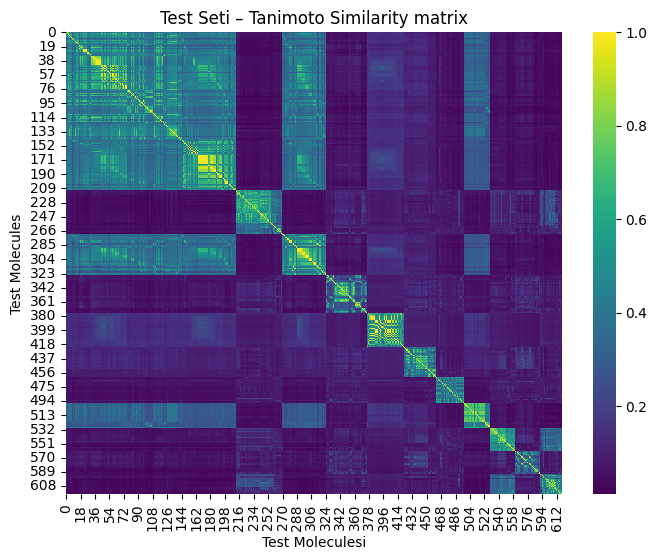

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(tanimoto_matrix, cmap="viridis")
plt.title("Test Seti – Tanimoto Similarity matrix")
plt.xlabel("Test Moleculesi")
plt.ylabel("Test Molecules")
plt.show()


In [182]:
from rdkit import DataStructs
import numpy as np

test_fps = df.loc[test_idx, "fingerprint"].tolist()
test_activity = df.loc[test_idx, "pIC50"].values

n_test = len(test_fps)


In [183]:
sali_matrix = np.zeros((n_test, n_test))

for i in range(n_test):
    for j in range(n_test):
        if i == j:
            sali_matrix[i, j] = 0.0
        else:
            tanimoto = DataStructs.TanimotoSimilarity(
                test_fps[i],
                test_fps[j]
            )

            # Sayısal stabilite
            if tanimoto < 1.0:
                sali_matrix[i, j] = abs(
                    test_activity[i] - test_activity[j]
                ) / (1.0 - tanimoto)
            else:
                sali_matrix[i, j] = np.nan


In [184]:
np.nanmin(sali_matrix), np.nanmax(sali_matrix)


(np.float64(0.0), np.float64(140.98861155247516))

In [186]:
sali_pairs = []

for i in range(n_test):
    for j in range(i + 1, n_test):
        sali_pairs.append({
            "Mol_i": i,
            "Mol_j": j,
            "pIC50_i": test_activity[i],
            "pIC50_j": test_activity[j],
            "Tanimoto": DataStructs.TanimotoSimilarity(
                test_fps[i],
                test_fps[j]
            ),
            "SALI": sali_matrix[i, j]
        })

sali_df = pd.DataFrame(sali_pairs)
sali_df.sort_values("SALI", ascending=False).head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI
137645,291,294,5.046000,8.045757,0.978723,140.988612
137643,291,292,5.046000,7.920819,0.978723,135.116491
136989,289,293,7.301030,4.921000,0.978723,111.861405
137317,290,293,7.301030,4.921000,0.978723,111.861405
23361,39,40,7.056011,5.824001,0.981132,65.296515
23363,39,42,7.056011,5.824001,0.981132,65.296515
26823,45,49,5.292000,6.638008,0.978261,61.916363
165857,393,405,6.096910,4.677781,0.975610,58.184302
165856,393,404,6.096910,4.677781,0.975610,58.184302
26825,45,51,5.292000,6.398005,0.978261,50.876237


In [187]:
sali_mean = sali_df["SALI"].mean()
sali_std  = sali_df["SALI"].std()

sali_mean, sali_std


(np.float64(1.893592477595215), 1.735535521399184)

In [188]:
threshold_2std = sali_mean + 2 * sali_std
threshold_3std = sali_mean + 3 * sali_std

threshold_2std, threshold_3std


(np.float64(5.3646635203935835), np.float64(7.100199041792767))

In [189]:
sali_df["cliff_2std"] = sali_df["SALI"] > threshold_2std
sali_df["cliff_3std"] = sali_df["SALI"] > threshold_3std


In [190]:
n_cliff_2std = sali_df["cliff_2std"].sum()
n_cliff_3std = sali_df["cliff_3std"].sum()

n_cliff_2std, n_cliff_3std


(np.int64(6167), np.int64(1743))

In [191]:
cliff_df = (
    sali_df[sali_df["cliff_2std"]]
    .sort_values("SALI", ascending=False)
    .reset_index(drop=True)
)

cliff_df.head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI,cliff_2std,cliff_3std
0,291,294,5.046000,8.045757,0.978723,140.988612,True,True
1,291,292,5.046000,7.920819,0.978723,135.116491,True,True
2,290,293,7.301030,4.921000,0.978723,111.861405,True,True
3,289,293,7.301030,4.921000,0.978723,111.861405,True,True
4,39,40,7.056011,5.824001,0.981132,65.296515,True,True
5,39,42,7.056011,5.824001,0.981132,65.296515,True,True
6,45,49,5.292000,6.638008,0.978261,61.916363,True,True
7,393,405,6.096910,4.677781,0.975610,58.184302,True,True
8,393,404,6.096910,4.677781,0.975610,58.184302,True,True
9,45,51,5.292000,6.398005,0.978261,50.876237,True,True


In [192]:
cliff_df_3std = (
    sali_df[sali_df["cliff_3std"]]
    .sort_values("SALI", ascending=False)
    .reset_index(drop=True)
)

cliff_df_3std.head(10)


,Mol_i,Mol_j,pIC50_i,pIC50_j,Tanimoto,SALI,cliff_2std,cliff_3std
0,291,294,5.046000,8.045757,0.978723,140.988612,True,True
1,291,292,5.046000,7.920819,0.978723,135.116491,True,True
2,290,293,7.301030,4.921000,0.978723,111.861405,True,True
3,289,293,7.301030,4.921000,0.978723,111.861405,True,True
4,39,40,7.056011,5.824001,0.981132,65.296515,True,True
5,39,42,7.056011,5.824001,0.981132,65.296515,True,True
6,45,49,5.292000,6.638008,0.978261,61.916363,True,True
7,393,404,6.096910,4.677781,0.975610,58.184302,True,True
8,393,405,6.096910,4.677781,0.975610,58.184302,True,True
9,45,51,5.292000,6.398005,0.978261,50.876237,True,True


In [193]:
cliff_df["Smiles_i"] = df.loc[test_idx, "Smiles"].values[cliff_df["Mol_i"]]
cliff_df["Smiles_j"] = df.loc[test_idx, "Smiles"].values[cliff_df["Mol_j"]]

cliff_df[["Smiles_i", "Smiles_j", "Tanimoto", "SALI"]].head()


,Smiles_i,Smiles_j,Tanimoto,SALI
0,CCCCCC[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,CCCCC[C@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,0.978723,140.988612
1,CCCCCC[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,CCCCC[C@@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,0.978723,135.116491
2,CCCCCCCC[C@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,CCCCC[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,0.978723,111.861405
3,CCCCCCCC[C@@H]1CC2C3CCC(=O)C3(C)CCC2C2(C)CCCC=C12,CCCCC[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@...,0.978723,111.861405
4,CCCCCC(=O)O[C@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=O)...,CCCCCCC(=O)O[C@@H]1C[C@@H]2[C@H](CC[C@]3(C)C(=...,0.981132,65.296515


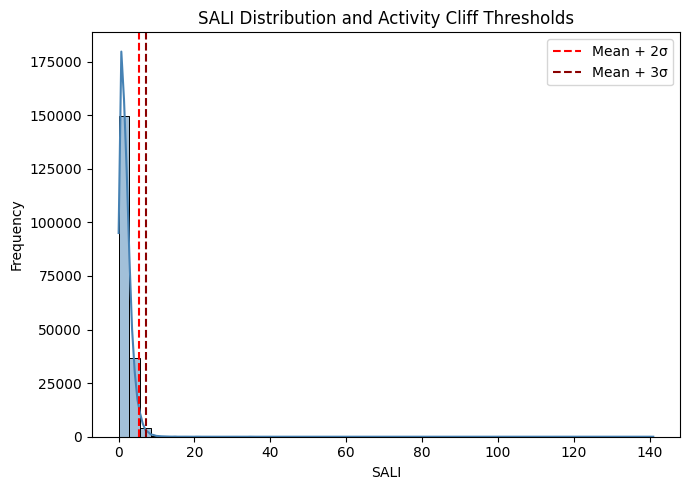

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))

sns.histplot(
    sali_df["SALI"],
    bins=50,
    kde=True,
    color="steelblue"
)

plt.axvline(threshold_2std, color="red", linestyle="--", label="Mean + 2σ")
plt.axvline(threshold_3std, color="darkred", linestyle="--", label="Mean + 3σ")

plt.xlabel("SALI")
plt.ylabel("Frequency")
plt.title("SALI Distribution and Activity Cliff Thresholds")
plt.legend()
plt.tight_layout()
plt.show()


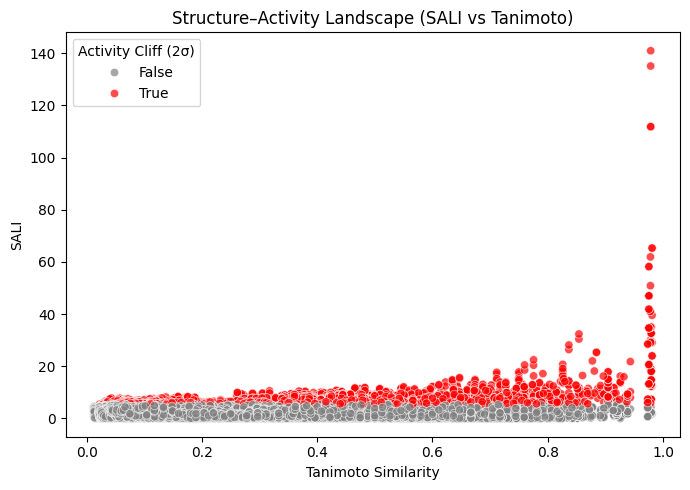

In [195]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=sali_df,
    x="Tanimoto",
    y="SALI",
    hue="cliff_2std",
    palette={True: "red", False: "gray"},
    alpha=0.7
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("Structure–Activity Landscape (SALI vs Tanimoto)")
plt.legend(title="Activity Cliff (2σ)")
plt.tight_layout()
plt.show()


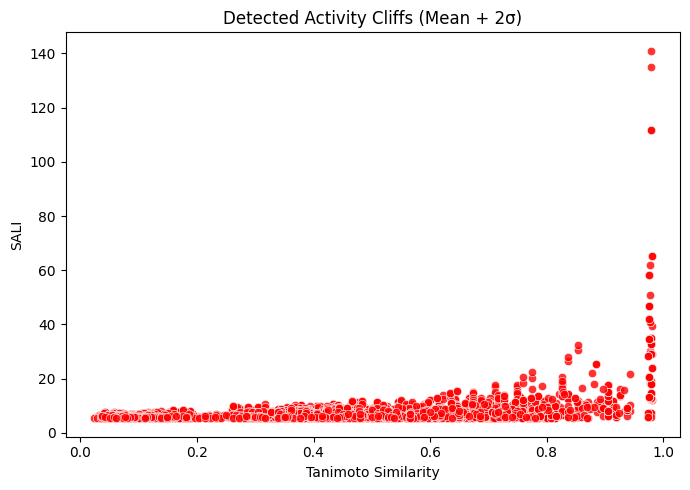

In [196]:
plt.figure(figsize=(7,5))

sns.scatterplot(
    data=sali_df[sali_df["cliff_2std"]],
    x="Tanimoto",
    y="SALI",
    color="red",
    alpha=0.8
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("Detected Activity Cliffs (Mean + 2σ)")
plt.tight_layout()
plt.show()


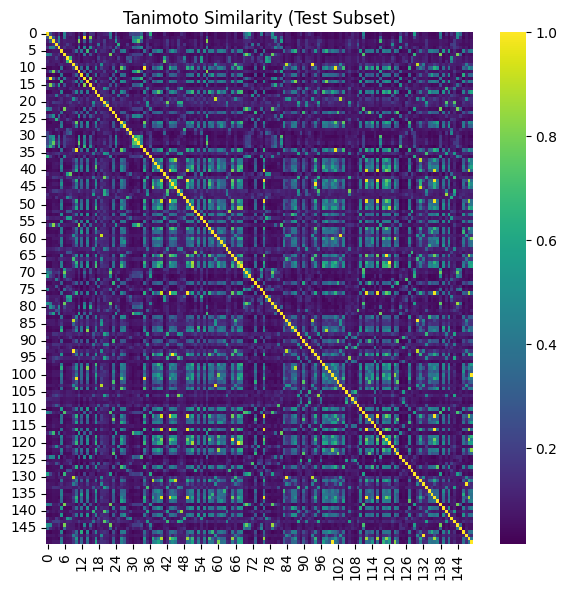

In [197]:
sub_idx = np.random.choice(
    np.arange(n_test),
    size=150,
    replace=False
)

tanimoto_sub = tanimoto_matrix[np.ix_(sub_idx, sub_idx)]

plt.figure(figsize=(6,6))
sns.heatmap(tanimoto_sub, cmap="viridis", cbar=True)
plt.title("Tanimoto Similarity (Test Subset)")
plt.tight_layout()
plt.show()


<Axes: xlabel='pIC50', ylabel='Count'>

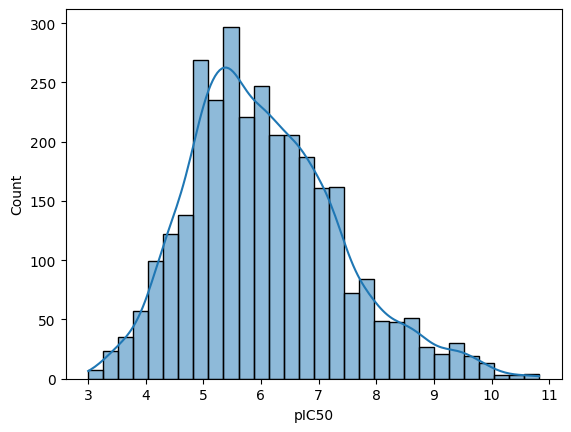

In [198]:
sns.histplot(df["pIC50"], bins=30, kde=True)


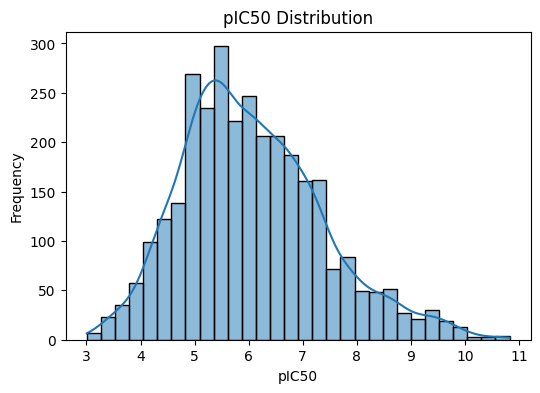

In [199]:
plt.figure(figsize=(6,4))
sns.histplot(df["pIC50"], bins=30, kde=True)

plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.title("pIC50 Distribution")

plt.savefig("figure1_pIC50_distribution.jpg", dpi=300, bbox_inches="tight")
plt.show()


In [200]:
df["pIC50"].describe()


,pIC50
count,3096.000000
mean,6.068601
std,1.309847
min,3.006123
25%,5.115063
50%,5.926035
75%,6.853996
max,10.823909


In [201]:
len(df)


3096

In [202]:
df["pIC50"].median()


5.9260353883677945

In [203]:
df["pIC50"].std()


1.3098466212505109

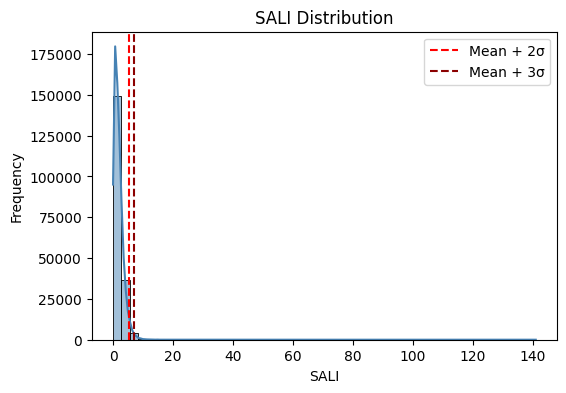

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.histplot(sali_df["SALI"], bins=50, kde=True, color="steelblue")
plt.axvline(threshold_2std, color="red", linestyle="--", label="Mean + 2σ")
plt.axvline(threshold_3std, color="darkred", linestyle="--", label="Mean + 3σ")

plt.xlabel("SALI")
plt.ylabel("Frequency")
plt.title("SALI Distribution")
plt.legend()

plt.savefig("figure2a_sali_histogram.jpg", dpi=300, bbox_inches="tight")
plt.show()


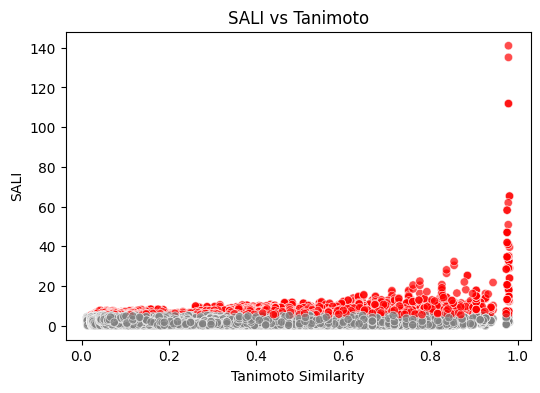

In [205]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=sali_df,
    x="Tanimoto",
    y="SALI",
    hue="cliff_2std",
    palette={True: "red", False: "gray"},
    alpha=0.7,
    legend=False
)

plt.xlabel("Tanimoto Similarity")
plt.ylabel("SALI")
plt.title("SALI vs Tanimoto")

plt.savefig("figure2b_sali_vs_tanimoto.jpg", dpi=300, bbox_inches="tight")
plt.show()
